In [1]:
from re import search

from matplotlib.pyplot import spring

from aoc import *
from copy import deepcopy
from collections import defaultdict, Counter, deque
import re
from tqdm import tqdm
import itertools
from datetime import datetime

year = datetime.now().year
day = datetime.now().day

if not os.path.exists("inputs"):
    os.mkdir("inputs")

if not os.path.exists(f"inputs/day_{day}_input.txt"):
    download_input(year, day)

aoc, lines, G, R, C = read_input(day, test=False)

lines[:5]=['97998,50303', '97998,51528', '98246,51528', '98246,52758', '98334,52758']
R=496, C=11


In [13]:
aoc, lines, G, R, C = read_input(day, test=False)

coords = [list(map(int, x.split(","))) for x in lines]

def distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def area(p1, p2):
    L = abs(p2[0] - p1[0]) + 1
    W = abs(p2[1]  - p1[1]) + 1
    #print(L, W)
    return L * W

print(coords)

biggest = 0
for i, coord_i in enumerate(coords):
    for j, coord_j in enumerate(coords):
        if j <= i:
            continue
        this_area = area(coord_i, coord_j)
        #print(coord_i, coord_j, this_area)
        if this_area > biggest:
            biggest = this_area

print(biggest)



lines[:5]=['97998,50303', '97998,51528', '98246,51528', '98246,52758', '98334,52758']
R=496, C=11
[[97998, 50303], [97998, 51528], [98246, 51528], [98246, 52758], [98334, 52758], [98334, 53970], [98115, 53970], [98115, 55177], [97898, 55177], [97898, 56309], [97159, 56309], [97159, 57617], [97707, 57617], [97707, 58713], [96904, 58713], [96904, 60057], [97417, 60057], [97417, 61182], [96839, 61182], [96839, 62334], [96426, 62334], [96426, 63382], [95674, 63382], [95674, 64674], [95755, 64674], [95755, 65711], [95031, 65711], [95031, 66823], [94555, 66823], [94555, 68115], [94529, 68115], [94529, 69185], [93936, 69185], [93936, 70384], [93635, 70384], [93635, 71488], [93115, 71488], [93115, 72421], [92270, 72421], [92270, 73762], [92180, 73762], [92180, 74512], [91044, 74512], [91044, 75481], [90310, 75481], [90310, 76703], [89964, 76703], [89964, 77769], [89363, 77769], [89363, 78593], [88427, 78593], [88427, 79337], [87409, 79337], [87409, 80427], [86837, 80427], [86837, 81183], [8586

In [45]:
aoc, lines, G, R, C = read_input(day, test=False)

reds = [list(map(int, x.split(","))) for x in lines]

pairs = list(zip(reds, reds[1:] + [reds[0]]))

# greens = set()
#
# for a, b in pairs:
#     for i in range(min(a[0], b[0]), max(a[0], b[0]) - 1):
#         for j in range(min(a[1], b[1]), max(a[1], b[1]) + 1):
#             if (i,j) == a or (i,j) == b:
#                 continue
#             greens.add((i, j))






lines[:5]=['97998,50303', '97998,51528', '98246,51528', '98246,52758', '98334,52758']
R=496, C=11


In [71]:
aoc, lines, G, R, C = read_input(day, test=False)

coords = [list(map(int, x.split(","))) for x in lines]

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from matplotlib.patches import Rectangle

def draw_guess(best):
    reds = [list(map(int, x.split(","))) for x in lines]
    reds = reds + [reds[0]]
    points = np.array(reds)


    # Build segments: shape (N-1, 2, 2) — each is [(x_i, y_i), (x_{i+1}, y_{i+1})]
    segments = np.stack([points[:-1], points[1:]], axis=1)

    # Color values: 0..N-2 (one value per segment)
    values = np.arange(len(segments))

    # Create the collection with a colormap
    lc = LineCollection(
        segments,
        cmap='viridis',          # try 'plasma', 'turbo', 'magma', etc.
        norm=plt.Normalize(values.min(), values.max()),
        linewidths=2
    )
    lc.set_array(values)         # attach the per-segment values for coloring

    fig, ax = plt.subplots()
    ax.add_collection(lc)

    # Plot the points as markers (optional)
    ax.plot(points[:, 0], points[:, 1], 'o', color='black', markersize=4, label='points')



    x1, y1 = best[0]
    x2, y2 = best[1]
    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)
    width  = xmax - xmin
    height = ymax - ymin

    # Add rectangle (outlined, no fill)
    rect = Rectangle((xmin, ymin), width, height,
                     linewidth=2, edgecolor='tab:blue', facecolor='none')
    ax.add_patch(rect)


    # Set sensible limits
    ax.set_xlim(points[:, 0].min()-0.5, points[:, 0].max()+0.5)
    ax.set_ylim(points[:, 1].min()-0.5, points[:, 1].max()+0.5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Polyline with color varying by position (index)')
    ax.grid(True)


    plt.rcParams['figure.figsize'] = (30, 20)   # width, height in inches
    plt.rcParams['figure.dpi'] = 120           # crisper output


    # Optional colorbar
    cbar = plt.colorbar(lc, ax=ax, label='segment index')
    plt.legend()
    plt.show()



lines[:5]=['97998,50303', '97998,51528', '98246,51528', '98246,52758', '98334,52758']
R=496, C=11


(31523, 48476)
(72466, 7535)


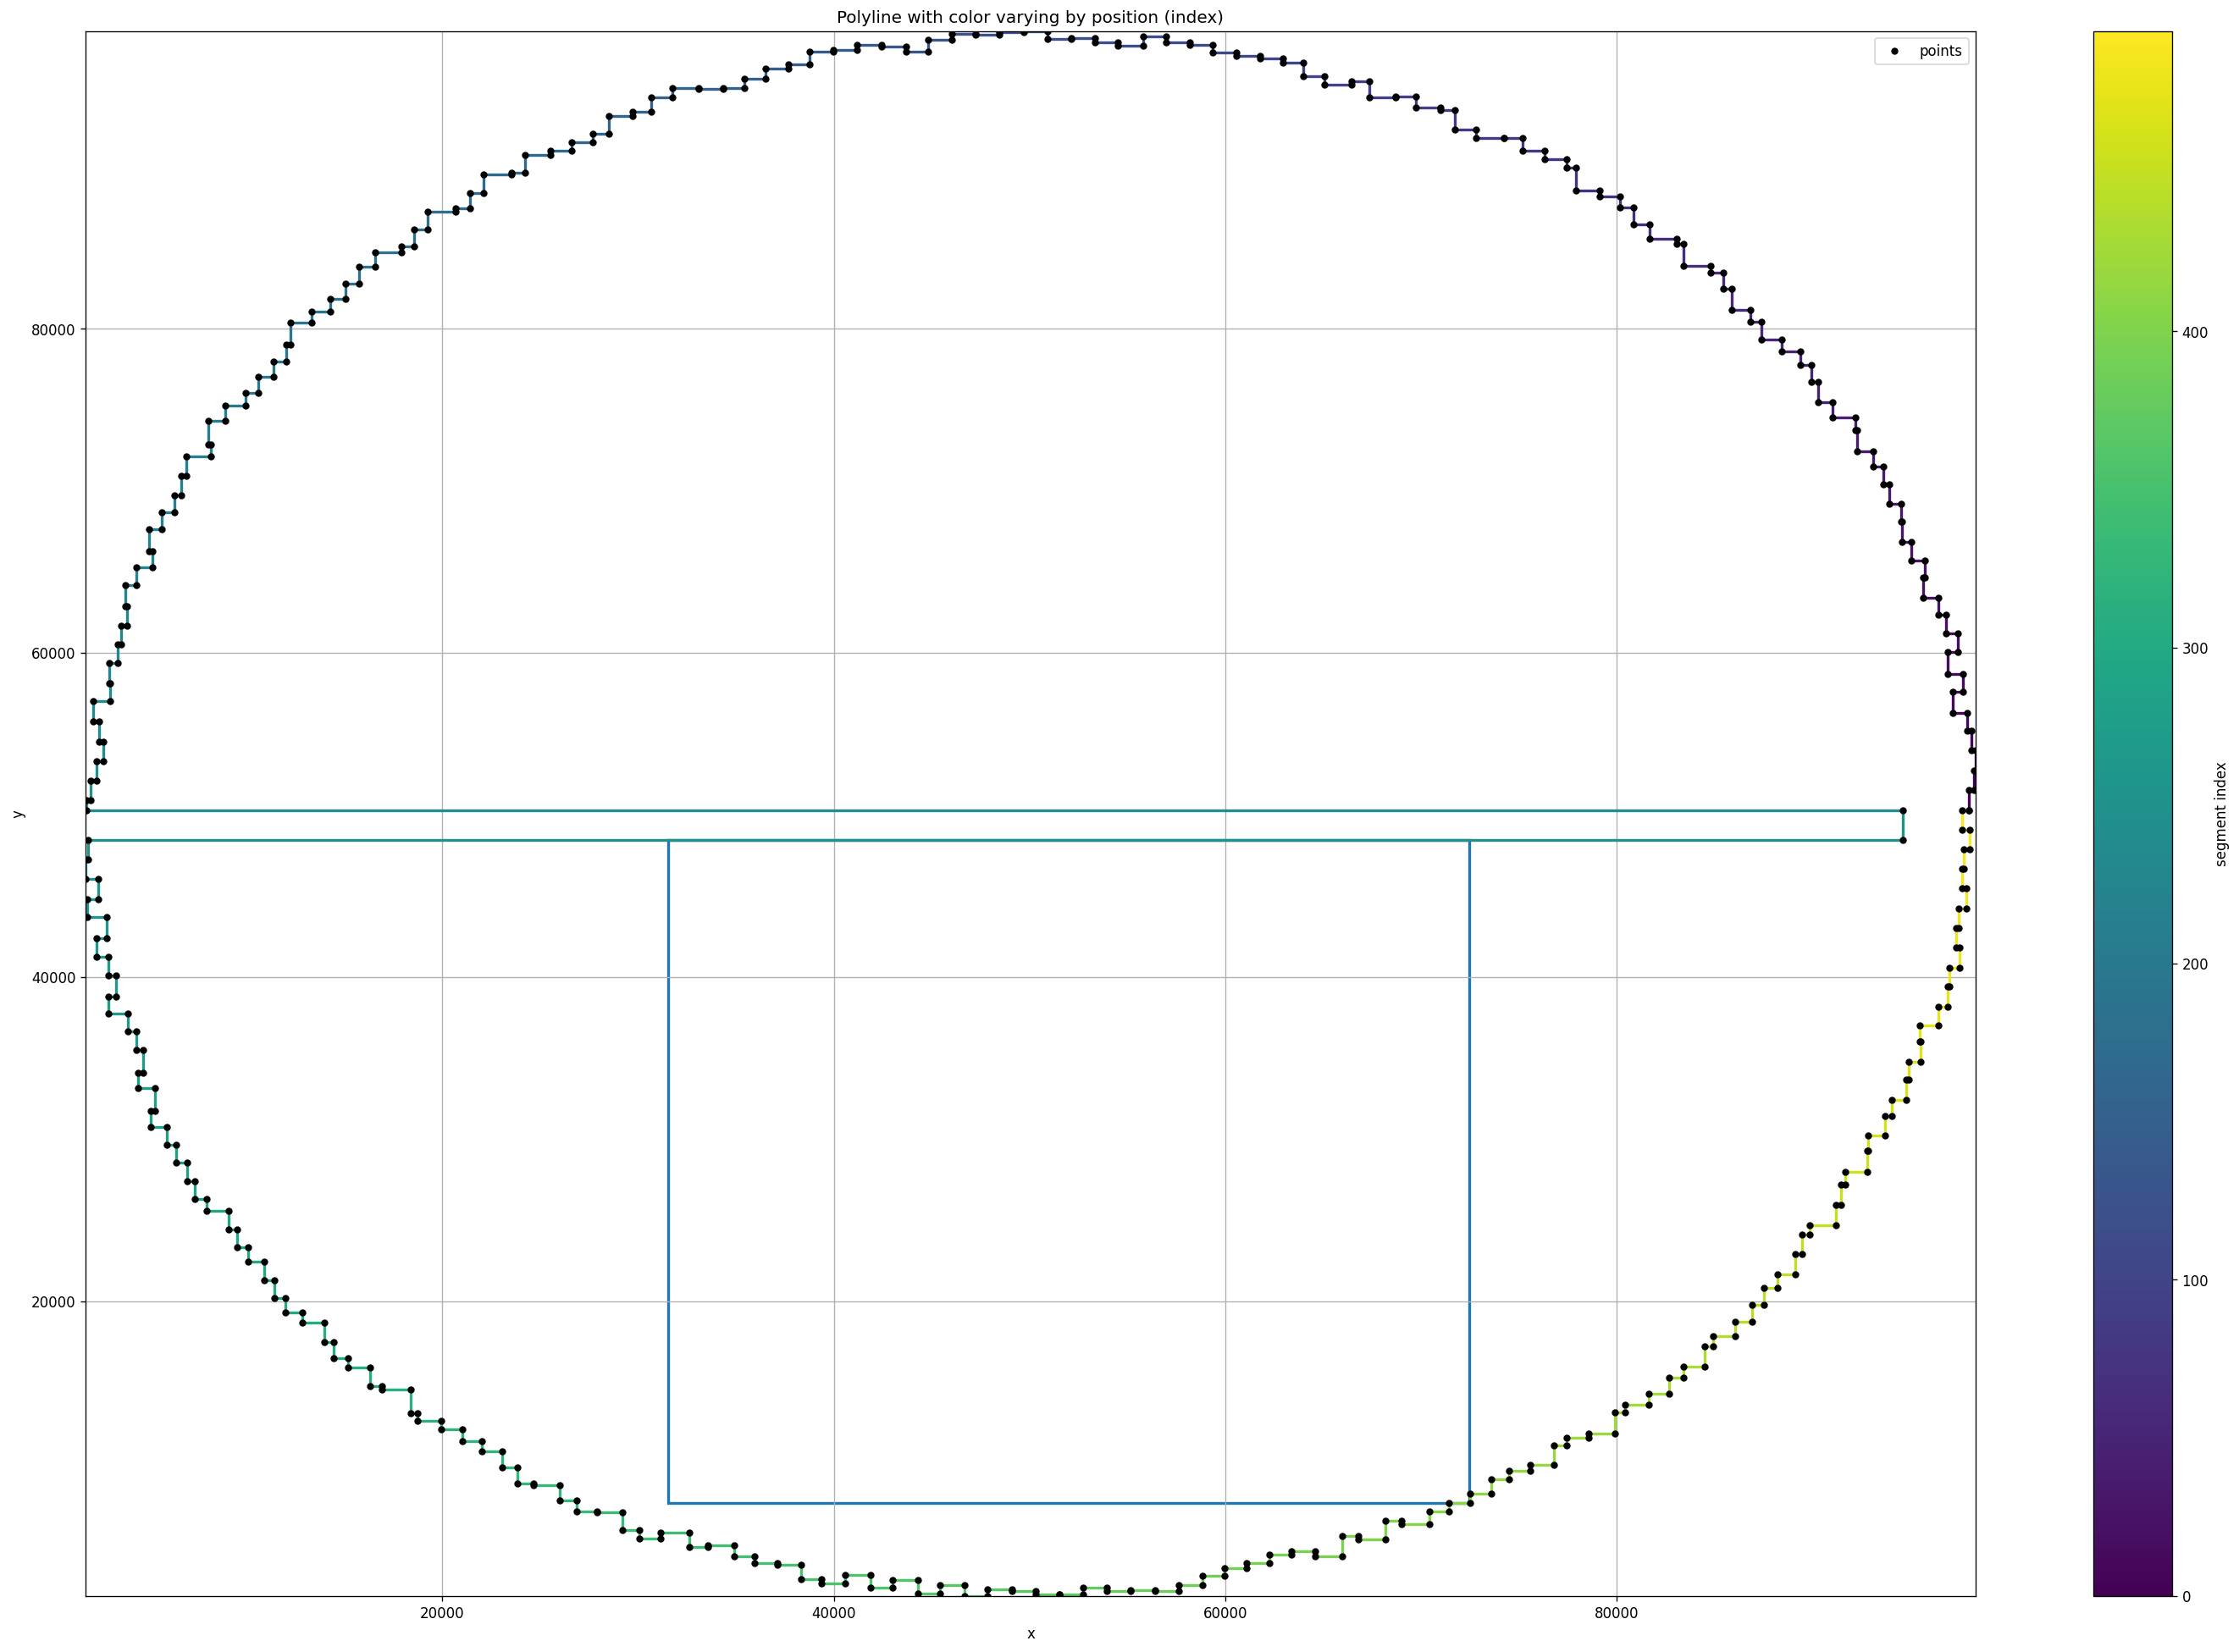

In [75]:
# start with a guess.

# grow until it breaks a rule (hits a line)

pairs = list(zip(reds, reds[1:] + [reds[0]]))



def point_on_any_segment(point, eps=1e-9):
    px, py = point
    for (x1, y1), (x2, y2) in pairs:
        # Cross product for colinearity
        if abs((x2 - x1) * (py - y1) - (y2 - y1) * (px - x1)) < eps:
            # Check bounding box
            if min(x1, x2) - eps <= px <= max(x1, x2) + eps and \
               min(y1, y2) - eps <= py <= max(y1, y2) + eps:
                return True
    return False


top_left = (40000,40000)
bottom_right = (60000,20000)

growing = {"left":True, "right":True, "up":True, "down":True}

while any(growing.values()):
    if i% 10000 == 0:
        print(i)

    if growing["left"]:
        top_left = (top_left[0] - 1, top_left[1])
        if point_on_any_segment(top_left):
            growing["left"] = False

    # if not growing["left"]:
    #     print(i)
    #     break

    if growing["right"]:
        bottom_right = (bottom_right[0] + 1, bottom_right[1])
        if point_on_any_segment(bottom_right):
            growing["right"] = False

    # if not growing["right"]:
    #     print(i)
    #     break

    if growing["up"]:
        top_left = (top_left[0], top_left[1]+1)
        if point_on_any_segment(top_left):
            growing["up"] = False

    # if not growing["up"]:
    #     print(i)
    #     break

    if growing["down"]:
        bottom_right = (bottom_right[0], bottom_right[1]-1)
        if point_on_any_segment(bottom_right):
            growing["down"] = False

    # if not growing["down"]:
    #     print(i)
    #     break


print(top_left)
print(bottom_right)

draw_guess((top_left,bottom_right))



